In [176]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.ticker import LinearLocator
import time
import seaborn as sns


In [140]:
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv',delimiter = ',')
df = pd.DataFrame(data)
date_object = []
for date in df["Date"]:
    date_object.append(dt.datetime.strptime(date, "%m/%d/%Y"))
df["Date"] = date_object
df["Year"] = df["Date"].dt.to_period("Y")
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913


In [194]:
Year = df.groupby(["Year"]).size().reset_index(name = "y");

<BarContainer object of 98 artists>

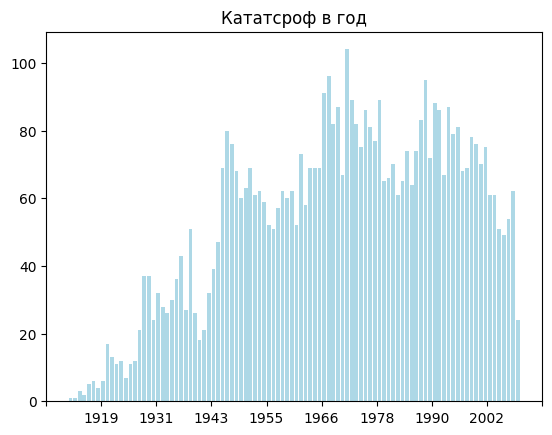

In [197]:
X = list(fatal.iloc[:, 0])
XX  = []
for x in X:
    x = str(x)
    XX.append(x)
Y = list(Year.iloc[:, 1])
axes = plt.subplot(1, 1, 1)
plt.title("Кататсроф в год")
axes.xaxis.set_major_locator(LinearLocator(10))
plt.bar(XX, Y, color='lightblue')

In [129]:
fatal = df.groupby(['Year'], as_index=False)['Fatalities'].sum()
fatal

,Year,Fatalities
0,1908,1.0
1,1912,5.0
2,1913,45.0
3,1915,40.0
4,1916,108.0
...,...,...
93,2005,1306.0
94,2006,1136.0
95,2007,931.0
96,2008,820.0


<BarContainer object of 98 artists>

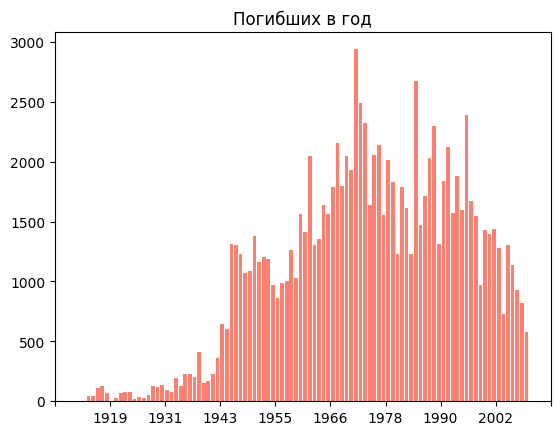

In [130]:
X = list(fatal.iloc[:, 0])
XX  = []
for x in X:
    x = str(x)
    XX.append(x)
Y = list(fatal.iloc[:, 1])
axes = plt.subplot(1, 1, 1)
plt.title("Погибших в год")
axes.xaxis.set_major_locator(LinearLocator(10))
plt.bar(XX, Y, color='salmon')

In [131]:
aboard = df.groupby(['Year'], as_index=False)['Aboard'].sum()
aboard

,Year,Aboard
0,1908,2.0
1,1912,5.0
2,1913,51.0
3,1915,60.0
4,1916,109.0
...,...,...
93,2005,2164.0
94,2006,1413.0
95,2007,1364.0
96,2008,1463.0


<BarContainer object of 98 artists>

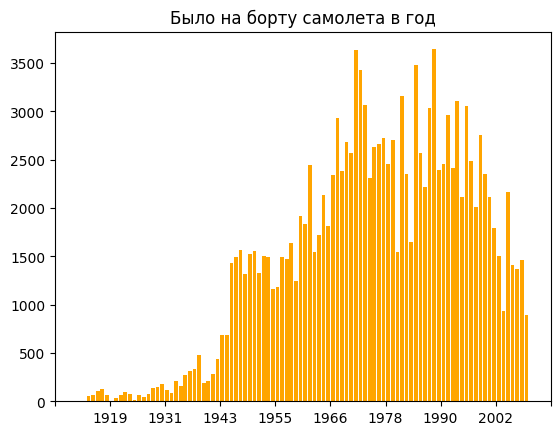

In [188]:
X = list(aboard.iloc[:, 0])
XX  = []
for x in X:
    x = str(x)
    XX.append(x)
Y = list(aboard.iloc[:, 1])
axes = plt.subplot(1, 1, 1)
plt.title("Было на борту самолета в год")
axes.xaxis.set_major_locator(LinearLocator(10))
plt.bar(XX, Y, color='orange')

In [133]:
df["Survived"] = df["Aboard"] - df["Fatalities"]
survived = df.groupby(['Year'], as_index=False)["Survived"].sum()
survived

,Year,Survived
0,1908,1.0
1,1912,0.0
2,1913,6.0
3,1915,20.0
4,1916,1.0
...,...,...
93,2005,858.0
94,2006,277.0
95,2007,433.0
96,2008,643.0


<BarContainer object of 98 artists>

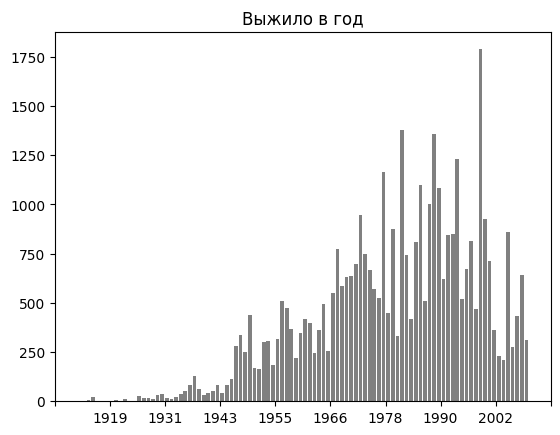

In [134]:
X = list(survived.iloc[:, 0])
XX  = []
for x in X:
    x = str(x)
    XX.append(x)
Y = list(survived.iloc[:, 1])
axes = plt.subplot(1, 1, 1)
plt.title("Выжило в год")
axes.xaxis.set_major_locator(LinearLocator(10))
plt.bar(XX, Y, color='gray')

In [141]:
T = []
for time in df["Time"]:
    if isinstance(time,float):
        T.append(time)
        continue
    if 'c:' in time:
        as_time = dt.datetime.strptime(time[3:], "%H:%M").time()
        T.append(as_time)
        continue
    if 'c' in time:
        as_time = dt.datetime.strptime(time[1:], "%H:%M").time()
        T.append(as_time)
        continue
    if "'" in time:
        time = time.replace("'",":")
        as_time = dt.datetime.strptime(time, "%H:%M").time()
        T.append(as_time)
        continue
    if "." in time:
        time = time.replace(".",":")
        as_time = dt.datetime.strptime(time, "%H:%M").time()
        T.append(as_time)
        continue
    if "114" in time:
        as_time = dt.datetime.strptime(time[1:], "%H:%M").time()
        T.append(as_time)
        continue
    if ":" not in time:
        time  = time[:1]+":" + time[2:]
        as_time = dt.datetime.strptime(time, "%H:%M").time()
        T.append(as_time)

        continue
    as_time = dt.datetime.strptime(time, "%H:%M").time()
    T.append(as_time)
df["Time"] = T

In [142]:
H = []
for time in df["Time"]:
    if isinstance(time,float):
        H.append(time)
        continue
    H.append(time.hour)
df["Hour"] = H

In [143]:
sector = []
for x in df["Hour"]:
    if (x > 4) and (x <= 8):
        sector.append('Early Morning')
    elif (x > 8) and (x <= 12 ):
        sector.append('Morning')
    elif (x > 12) and (x <= 16):
        sector.append('Noon')
    elif (x > 16) and (x <= 20) :
        sector.append('Evening')
    elif (x > 20) and (x <= 23):
        sector.append('Night')
    elif (x <= 4):
        sector.append('Late Night')
    elif isinstance(x,float):
        sector.append(x)
df["Period"] = sector
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Hour,Period
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,17.0,Evening
1,1912-07-12,06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,6.0,Early Morning
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,NaN,NaN
3,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,18.0,Evening
4,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10.0,Morning


In [221]:
P = df.groupby(['Period']).size().reset_index(name = "Crashes");
P

,Period,Crashes
0,Early Morning,419
1,Evening,637
2,Late Night,325
3,Morning,690
4,Night,325
5,Noon,653


<Axes: xlabel='Period', ylabel='Crashes'>

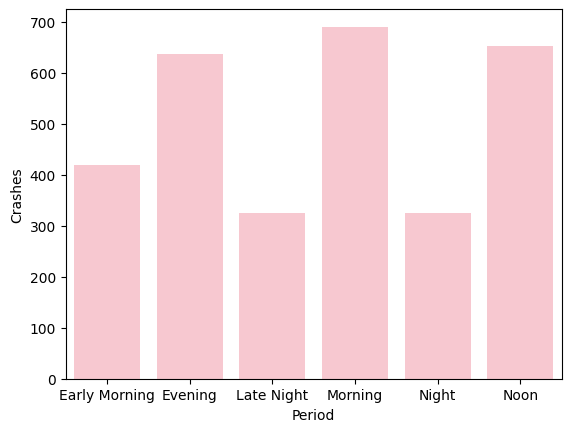

In [222]:
sns.barplot(y = "Crashes",x = "Period", data = P,color = "pink")

In [218]:
loc = df["Location"].str.split(",", n = 2, expand = True)
df["State"]= loc[0]
df["State1"]= loc[1]
df["Country"]= loc[2]
df["Country"].fillna(df["State1"], inplace=True)
df["Country"].fillna(df["State"], inplace=True)
states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
    'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
    'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
    'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

states = ' '.join(states)

for elem in df["Country"]:
    if isinstance(elem,float):
        continue
    if elem in states:
        df["Country"].replace(elem,"USA", inplace = True)
        
df = df.drop('State1',axis = 1)
df = df.drop('State',axis = 1)
df

C:\Users\asus\AppData\Local\Temp\ipykernel_4588\288387565.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Country"].fillna(df["State1"], inplace=True)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Year,Hour,Period,Country
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,1908,17.0,Evening,USA
1,1912-07-12,06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,1912,6.0,Early Morning,USA
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1913,NaN,NaN,Canada
3,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,1913,18.0,Evening,Over the North Sea
4,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,1913,10.0,Morning,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30:00,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,2009,6.0,Early Morning,Indonesia
5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,2009,NaN,NaN,DemocratiRepubliCongo
5265,2009-06-01,00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,2009,0.0,Late Night,Brazil
5266,2009-06-07,08:30:00,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,2009,8.0,Early Morning,Canada


In [219]:
W = df.groupby(['Country']).size().reset_index(name = "crashes");
W = W.sort_values(by = "crashes", ascending = False).head(10);
W

,Country,crashes
509,USA,1540
71,Brazil,184
278,Russia,171
99,Colombia,146
86,Canada,144
139,France,129
132,England,103
97,China,85
174,Indonesia,84
151,Germany,78


<Axes: xlabel='crashes', ylabel='Country'>

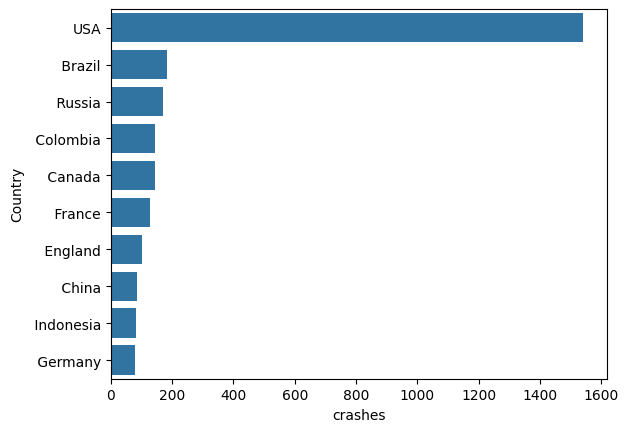

In [220]:
sns.barplot(y = "Country", x = "crashes", data = W)